In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import *

In [2]:
arr = np.random.rand(2)
print(arr)
# arr[::-1].sort()
# print(arr)


[0.40882228 0.75774709]


In [3]:
NUMBER_OF_NODE = 10;
NUMBER_OF_VOTE = "number_of_vote"
POINT = "point"
NUMBER_OF_VALIDATOR = "number_of_validator"

#init nodes
def init_nodes(number_of_node):
    nodes = []
    for i in range(number_of_node):
        nodes.append({})
        nodes[i][NUMBER_OF_VOTE] = 0
        nodes[i][NUMBER_OF_VALIDATOR] = 0
        nodes[i][POINT] = 0
    
    return nodes

In [23]:
def simulator(nodes):
    if len(nodes) == 0:
        print("number of node is 0, return")
        return
    #select leader
    
    #random array with length is number of canidate of leader
    rand_arr = np.random.rand(len(nodes)).tolist()
#     rand_arr = np.sort(rand_arr)[::-1]
    for i in range(len(rand_arr)):
        nodes[i][POINT] += rand_arr[i]
    
    #select lead node
    index_of_leader = -1
    maximum = -1
    for i in range(len(rand_arr)):
        if rand_arr[i] > maximum:
            index_of_leader = i
            maximum = rand_arr[i]
    if index_of_leader == -1:
        print("index of leader is -1, return")
        return
    nodes[index_of_leader][NUMBER_OF_VOTE] += 1
    
    #select validator
    
    point_arr = []
    total = 0
    for i in range(len(nodes)):
        if i != index_of_leader:
            total += nodes[i][POINT]
            point_arr.append(nodes[i][POINT])
    mean = total/(len(nodes) - 1)
    
    rand_ranking = np.random.rand(len(nodes) -1).tolist()
    
    
    index_of_validator = -1
    maximum = -1
    for i in range(len(rand_ranking)):
        if mean != 0:
            rank_point = rand_ranking[i] * point_arr[i] * 1/mean
        else:
            rank_point = rand_ranking[i] * point_arr[i]
        if rank_point > maximum:
            index_of_validator = i
            maximum = rank_point
     
    if index_of_validator == -1:
        print("index of validator is -1, return")
    if index_of_validator >= index_of_leader:
        nodes[index_of_validator + 1][NUMBER_OF_VALIDATOR] += 1
    else:
        nodes[index_of_validator][NUMBER_OF_VALIDATOR] += 1


    
    

In [24]:
nodes = init_nodes(100)
for k in range(200):
    simulator(nodes)

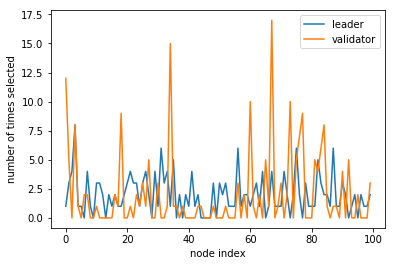

In [25]:
x_array = []
leader_y_array = []
validator_y_array = []
points_y_array = []
for i in range(len(nodes)):
    x_array.append(i)
    leader_y_array.append(nodes[i][NUMBER_OF_VOTE])
    validator_y_array.append(nodes[i][NUMBER_OF_VALIDATOR])
    points_y_array.append(nodes[i][POINT])
plt.xlabel("node index")
plt.ylabel("number of times selected")

plt.plot(x_array, leader_y_array, label='leader')
plt.plot(x_array, validator_y_array, label='validator')
plt.legend()
plt.show()

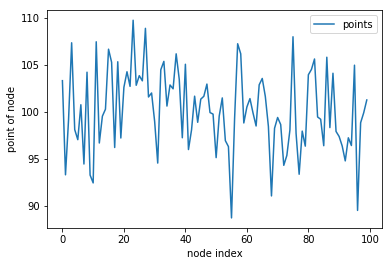

In [19]:
plt.xlabel("node index")
plt.ylabel("point of node")

plt.plot(x_array, points_y_array, label='points')
plt.legend()
plt.show()